# Boston Housing Dataset


<img src= "https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/boston.jpg" width=1000>

The Boston data frame has 506 rows and 14 columns.This dataframe contains the following columns:


CRIM  = per capita crime rate by town.

ZN = proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS = proportion of non-retail business acres per town.

CHAS = Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

NOX = nitrogen oxides concentration (parts per 10 million).

RM = average number of rooms per dwelling.

AGE = proportion of owner-occupied units built prior to 1940.

DIS = weighted mean of distances to five Boston employment centres.

RAD = index of accessibility to radial highways.

TAX = full-value property-tax rate per $10,000.

PTRATIO = pupil-teacher ratio by town.

BLACK = 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

LSTAT = lower status of the population (percent).

MEDV = price median value of owner-occupied homes in $1000s

** Price is the TARGET variable **

preview dataset
Data preview
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   

       B  LSTAT  PRICE  
0  396.9   4.98   24.0  
1  396.9   9.14   21.6  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 

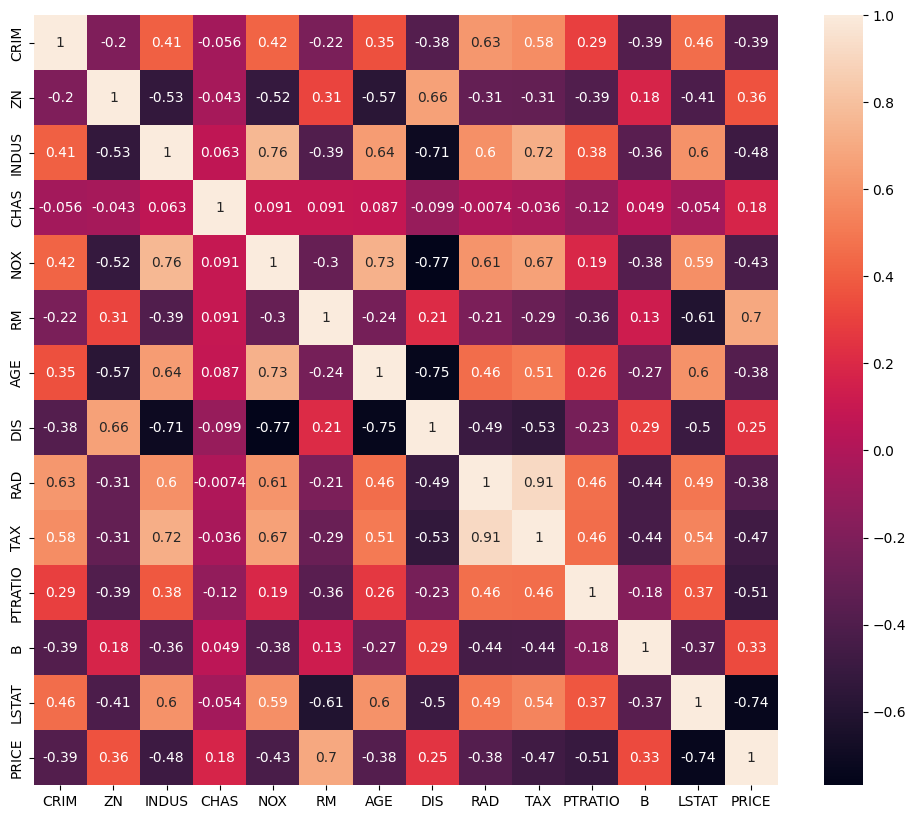

Set the target


In [1]:
# crim nessuno vuole vivere nei ghetti dei criminali
# varialtri parametri
# DIS distanza dalle prime fabbriche
# RAD distanza da superstrada
# numero insegnanti elevato
# BLACK numero dei neri (controverso) stato tolto


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url='https://frenzy86.s3.eu-west-2.amazonaws.com/IFAO/boston_houses.csv'
path="03-boston_houses.csv"

__plot__=False # per alleggerire il NB

print("preview dataset")
preview_window=2
df = pd.read_csv(path)

df.rename(columns={'MEDV': 'PRICE'}, inplace=True) #preview

print("Data preview")
print(df.head(preview_window))
print(df.info())
print(df.describe().T)
print(df.isnull().sum())


if __plot__:
    print("Pairplot")
    sns.pairplot(df,hue='AGE' , height=2);
    plt.show()



print("Correlation analisys")
print(df.corr())
plt.figure(figsize = (12, 10))
sns.heatmap(df.corr(),annot=True);
plt.show()







# Data Visualization

CREARE VARIABILI CATEGORICHE PER VARIABILI CONTINUE E VISUALIZZARLE

AGE_category
New         147
Old         149
Very_Old    210
dtype: int64
Violinplot categorie Age


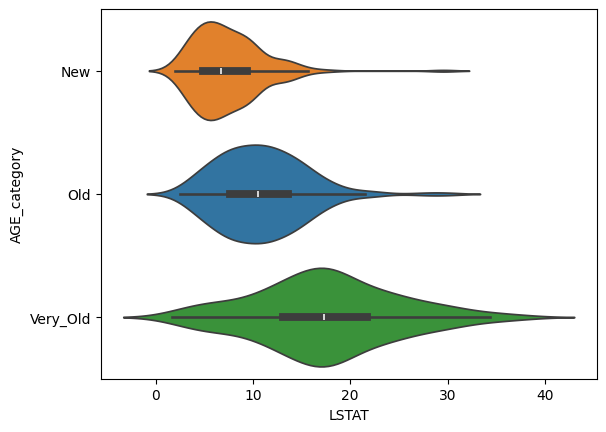

Fine esperimento


In [8]:
df_cat=df.copy() # applichiamo copia per poter manipolare il dataframe

def get_age_category(x):
    """Categorizza in base alla legge dell'occupante per disinguere"""
    if x < 50:
        return 'New'
    elif 50 <= x < 85:
        return 'Old'
    else:
        return 'Very_Old'

df_cat['AGE_category'] = df_cat.AGE.apply(get_age_category) # applicata a tutte le colonne (l'argomento sarà cella per celle della series AGE)

# attn.ne alle variabili e ai filtri
print(df_cat.groupby('AGE_category').size()) # conta le classi delle mie categorie per capire il bilanciamento della mia categorizzazione

print("Violinplot categorie Age")
sns.violinplot(x='LSTAT', y='AGE_category', data=df_cat, order=['New', 'Old','Very_Old'],hue='AGE_category');
plt.show()

if __plot__:
    print("Pairplot Age category manual handled")
    sns.pairplot(df_cat, hue='AGE_category',hue_order=['New', 'Old','Very_Old']); # pariplot con classi in base 
    plt.show()


print('Fine esperimento')

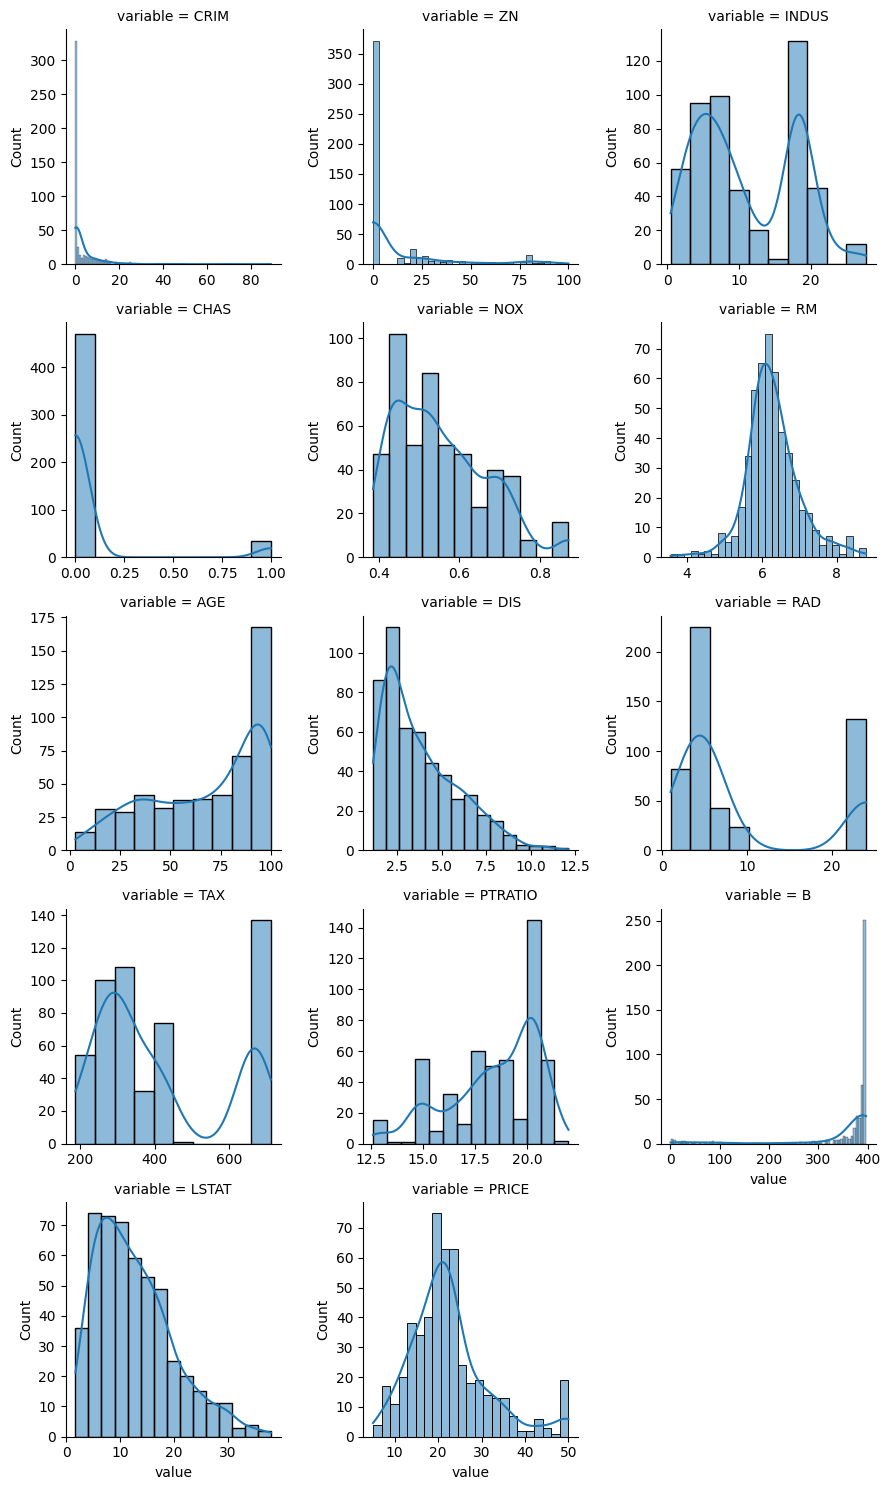

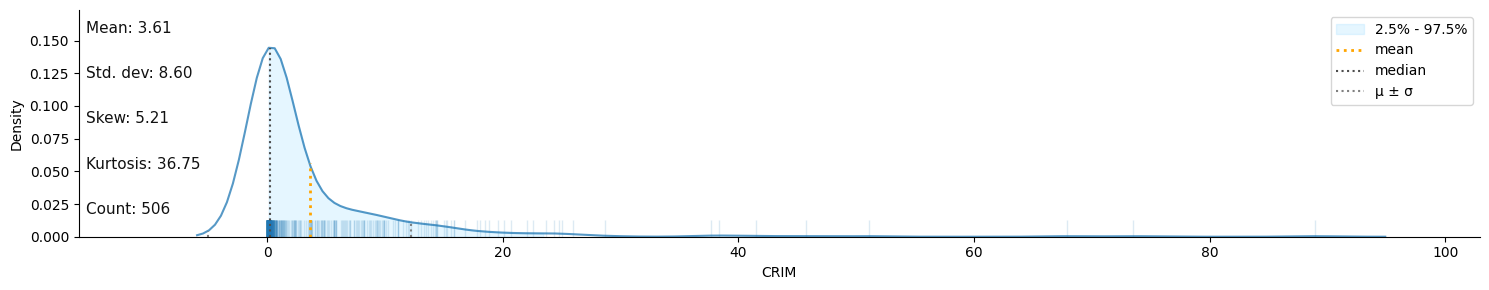

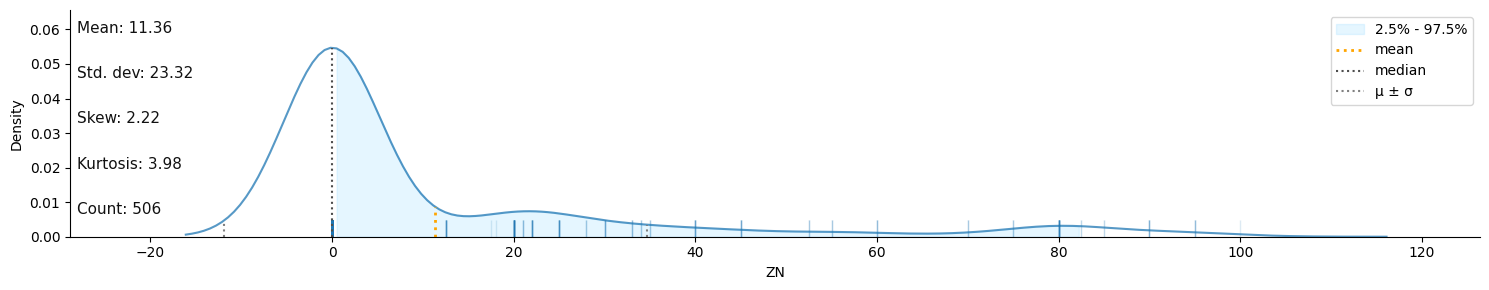

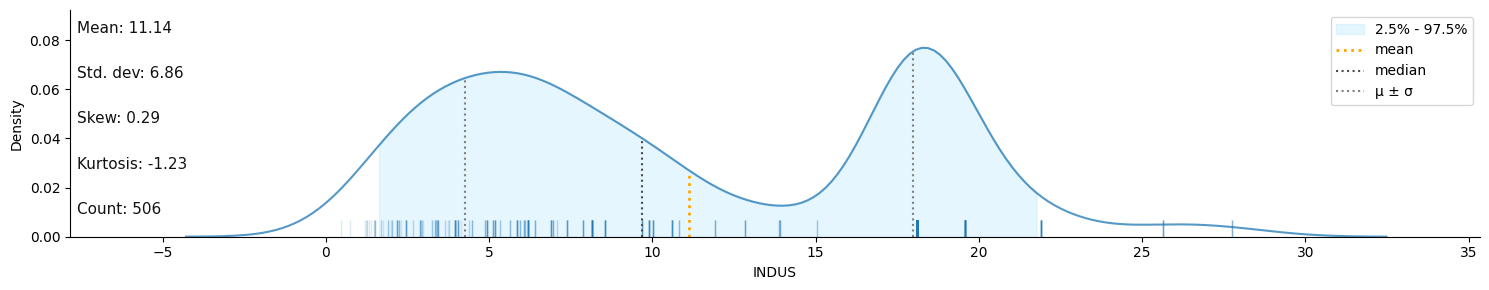

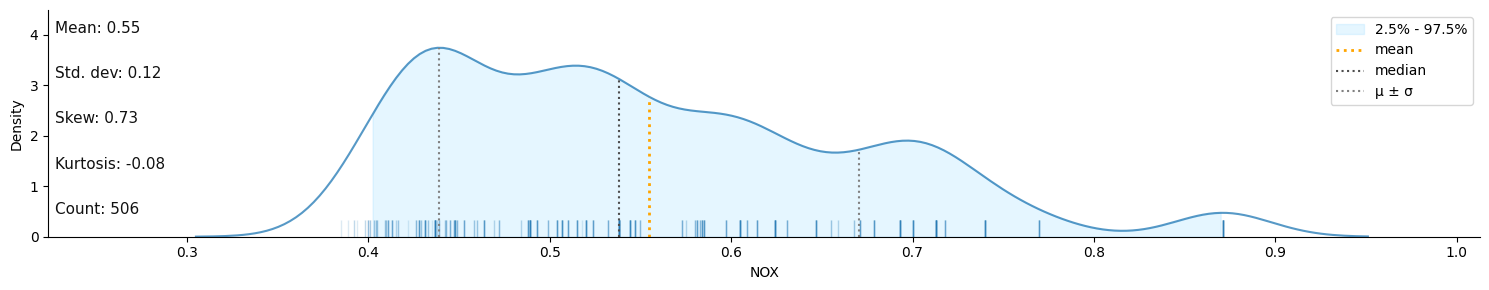

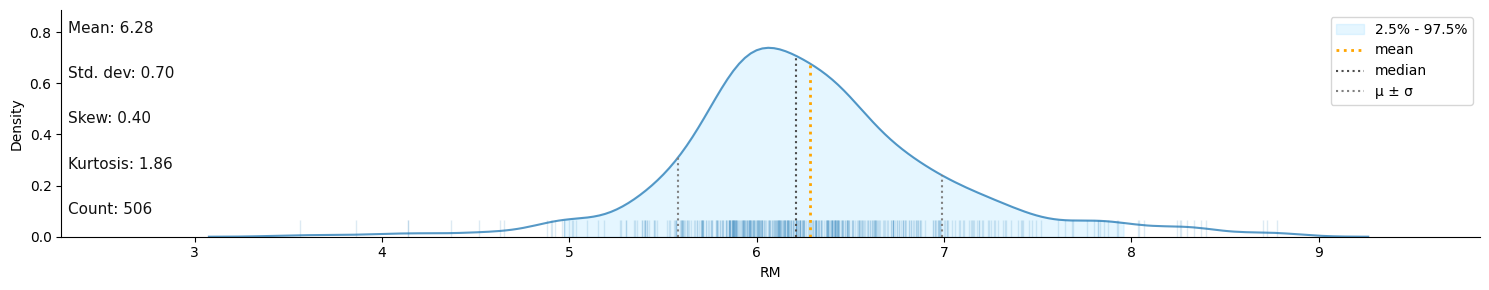

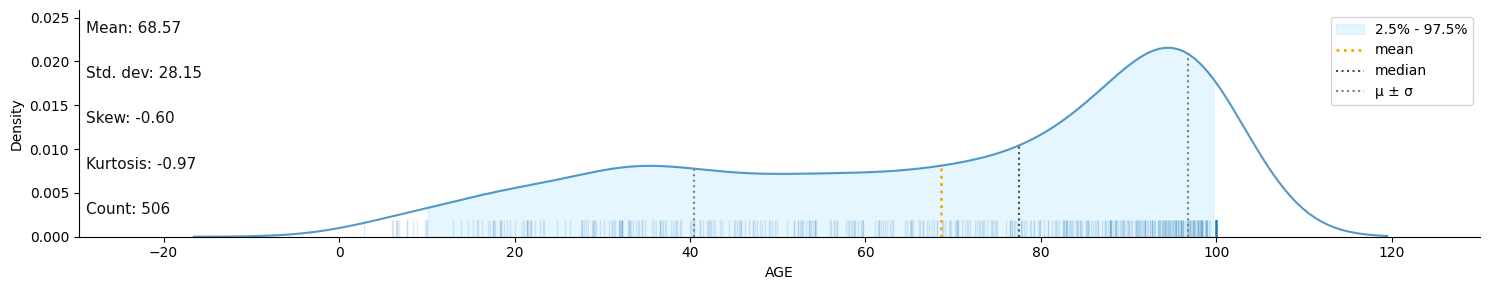

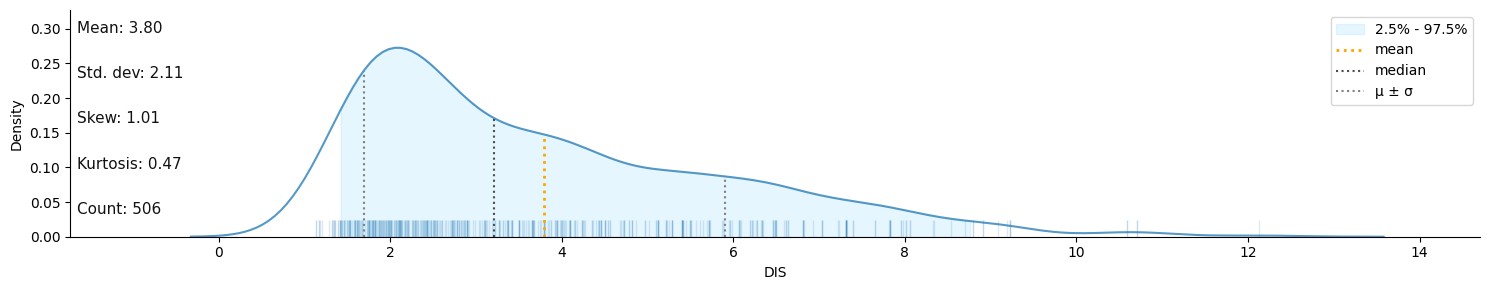

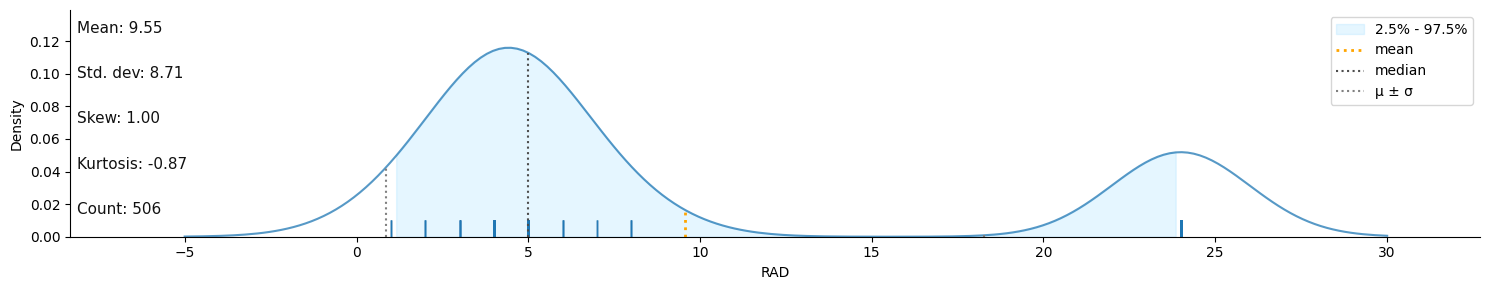

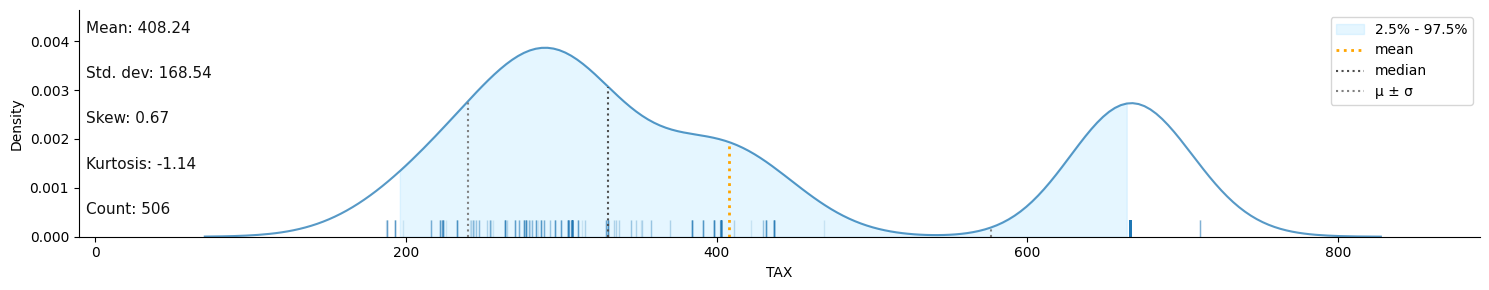

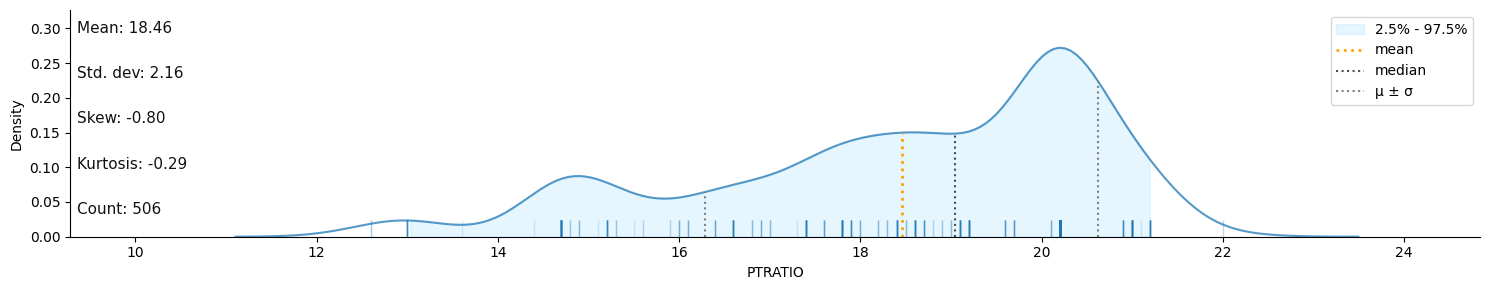

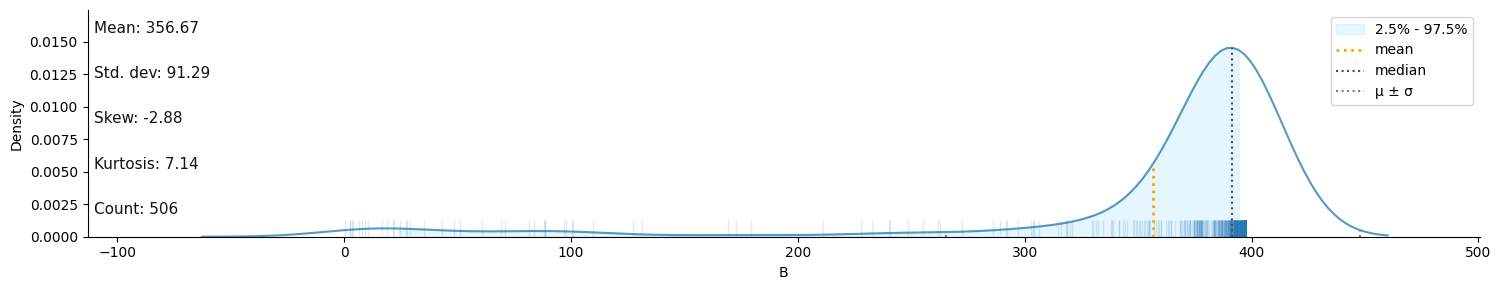

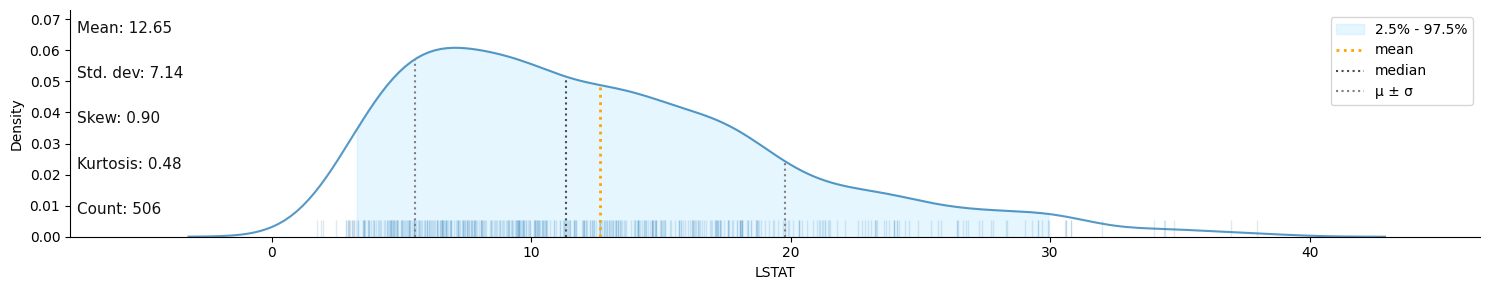

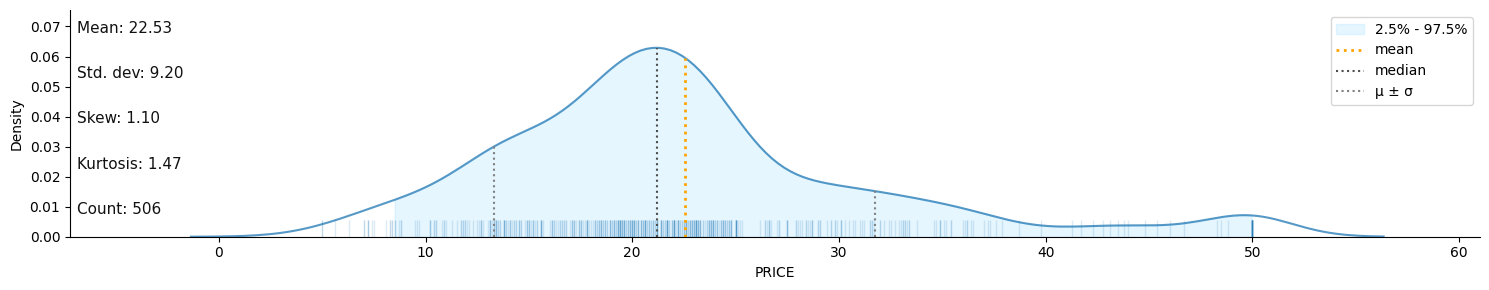

In [12]:
# define numeric and categorical columns
num_col = df.describe().columns.tolist()
all_col = df.columns.tolist()
obj_col = [i for i in all_col if i not in num_col]


def viz(df, types):
    """funzione per distinguere le distribuzioni quando abbiamo numerosità elevata di plot"""
    f = pd.melt(df, value_vars=df)
    g = sns.FacetGrid(f, col="variable", col_wrap=3, sharex=False, sharey=False)
    g.map(types, "value", kde=True if types == sns.histplot else False)
    plt.show()
    return g

# histogram visualization
viz(df[num_col], sns.histplot) ; # avoid 


import klib
klib.dist_plot(df)
plt.show()

## Regressione con tutte le Features

In [13]:
## step 0 capire problema e impostare un dataset definito plottando qualche variabile

## STEP1 DEFINIZIONE DI INPUT E OUTPUT
print('STEP1 DEFINIZIONE DI INPUT E OUTPUT')

TARGET = 'PRICE'
X = df.drop(columns=[TARGET]) # is a Matrix
y = df[TARGET]

print('STEP2 TRAIN TEST SPLIT')
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=667, )

print('STEP3 MODELLAZIONE')
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

print('STEP4 PREDIZIONE')
y_pred = model.predict(X_test)

print('STEP5 VERIFICA METRICHE')
from sklearn.metrics import r2_score,mean_absolute_error,root_mean_squared_error,mean_squared_error

r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = root_mean_squared_error(y_test,y_pred)

print(f'R2 score {r2}')
print(f'MSE score {mse}')
print(f'MAE score {mae}')
print(f'RMSE score {rmse}') # Alto perchè il nostro modello sbaglia di 
                            # molto perchè abbiamo preso tutto il dataset, 
                            # forse abbiamo preso troppe variabili, anche variabili di "disturbo" 

STEP1 DEFINIZIONE DI INPUT E OUTPUT
STEP2 TRAIN TEST SPLIT
STEP3 MODELLAZIONE
STEP4 PREDIZIONE
STEP5 VERIFICA METRICHE
R2 score 0.6113097827490284
MSE score 34.485513964839186
MAE score 3.683772031811659
RMSE score 5.872436799561081


### Feature Selection with correlation

In [ ]:
corrmat = data.corr()
corrmat

In [ ]:
plt.figure(figsize = (12, 10))
sns.heatmap(corrmat, annot = True, annot_kws={'size': 12});

In [ ]:
corrmat.index.values

In [ ]:
##1
def getCorrelatedFeature(corrdata, threshold):
    """Toglie variabili sotto soglia"""
    feature = []
    value = []

    for i, index in enumerate(corrdata.index):
        if abs(corrdata[index])> threshold:
            feature.append(index)
            value.append(corrdata[index])

    df = pd.DataFrame(data = value, index = feature, columns=['Corr Value'])
    return df

In [ ]:
# Prendi la colonna Price del dataframe data, applica la treshold e includi in questo dataframe le features
threshold = 0.40
corr_value = getCorrelatedFeature(corrmat['Price'], threshold)
corr_value


In [ ]:
corr_value.index.values


In [ ]:
correlated_data = data[corr_value.index]
correlated_data

In [ ]:
correlated_data.shape

In [ ]:
sns.pairplot(correlated_data)
plt.tight_layout()

# iniziamo a vedere gli outlier da vedere se il dominio ha senso

In [ ]:
sns.heatmap(correlated_data.corr(), annot=True, annot_kws={'size': 12});
# heatmap con parte interessatne

## Shuffle and Split Data

In [ ]:
from sklearn.model_selection import train_test_split # rempre sempre
from sklearn.linear_model import LinearRegression  # problema di regressione
from sklearn.metrics import r2_score,mean_absolute_error,root_mean_squared_error,mean_squared_error

In [ ]:
X = correlated_data.drop(labels=['Price'], axis = 1)
y = correlated_data['Price']
X.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 667
                                                    )

In [ ]:
X_train.shape, X_test.shape

## Start train the model

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
df = pd.DataFrame(data = [y_pred, y_test])
df = df.T
df.columns = ['predetti', 'reali_test']
df

In [ ]:
length = y_pred.shape[0] #
x = np.linspace(0,length,length)


plt.figure(figsize=(15,10))
plt.plot(x, y_test, label='test')
plt.plot(x, y_pred, label='predetto')
plt.legend(loc=2);

## Defining performance metrics


It is difficult to measure the quality of a given model without quantifying its performance over training and testing. This is typically done using some type of performance metric, whether it is through calculating some type of error, the goodness of fit, or some other useful measurement. For this project, you will be calculating the coefficient of determination, R2, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions.

The values for R2 range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the target variable. A model with an R2 of 0 always fails to predict the target variable, whereas a model with an R2 of 1 perfectly predicts the target variable. Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the features. A model can be given a negative R2 as well, which indicates that the model is no better than one that naively predicts the mean of the target variable.

For the performance_metric function in the code cell below, you will need to implement the following:

Use r2_score from sklearn.metrics to perform a performance calculation between y_true and y_predict. Assign the performance score to the score variable.

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$
Mean Squared Error (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$
Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$
Comparing these metrics:

MAE is the easiest to understand, because it's the average error.
MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.
All of these are loss functions, because we want to minimize them.

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
correlated_data.columns


In [ ]:
score = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

print('r2_score: ', score) # peggiorativo
print('mae: ', mae)
print('mse: ', mse)
print('rmse: ', rmse)

In [ ]:
threshold = 0.45
corr_value = getCorrelatedFeature(corrmat['Price'], threshold)
corr_value

In [ ]:
##2
total_features = []
total_features_name = []
selected_correlation_value = []
r2_scores = []
r2_adjusted_scores = []
mae_values = []
mse_values = []
rmse_values = []

def performance_metrics(features, th, y_true, y_pred):
    """a variare del range di correlazione mi calcoli il benchmark per capire """
    n = len(y_true)
    p = len(features) - 1  # excluding the intercept

    r2 = r2_score(y_true, y_pred)
    adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred)

    total_features.append(len(features) - 1)
    total_features_name.append(str(features))
    selected_correlation_value.append(th)
    r2_scores.append(round(r2,2))
    r2_adjusted_scores.append(round(adj_r2,2))
    mae_values.append(round(mae,2))
    mse_values.append(round(mse,2))
    rmse_values.append(round(rmse,2))

    metrics_dataframe = pd.DataFrame(data=[total_features_name, total_features, selected_correlation_value,
                                           r2_scores, r2_adjusted_scores, mae_values, mse_values, rmse_values],
                                     index=['features name', '#feature', 'corr_value', 'R2', 'R2_adjusted', 'MAE', 'MSE', 'RMSE'])
    return metrics_dataframe.T

In [ ]:
performance_metrics(correlated_data.columns.values, threshold, y_test, y_pred)

## regression plot of the features correlated with the price

In [ ]:
rows = 3
cols = 2
fig, ax = plt.subplots(nrows=rows, ncols=cols, figsize = (12, 3))

col = correlated_data.columns
index = 0

for i in range(rows):
    for j in range(cols):
        sns.regplot(x = correlated_data[col[index]], y = correlated_data['Price'], ax = ax[i][j])
        index = index + 1
fig.tight_layout()

### Let's find out other combination of columns to get better accuracy >60%

In [ ]:
corrmat['Price']


In [ ]:
threshold = 0.50
corr_value = getCorrelatedFeature(corrmat['Price'], threshold)
corr_value

In [ ]:
correlated_data = data[corr_value.index]
correlated_data.head()

In [ ]:
##3

def get_y_predict(corr_data):
    X = corr_data.drop(labels = ['Price'], axis = 1)
    y = corr_data['Price']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 667)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred,y_test

In [ ]:
y_pred,y_test = get_y_predict(correlated_data)


In [ ]:
performance_metrics(correlated_data.columns.values, threshold, y_test, y_pred)


Let's find out other combination of columns to get better accuracy >70%

In [ ]:
corrmat['Price']


In [ ]:
threshold = 0.60
corr_value = getCorrelatedFeature(corrmat['Price'], threshold)
corr_value

In [ ]:
correlated_data = data[corr_value.index]
correlated_data.head()

In [ ]:
y_pred,y_test = get_y_predict(correlated_data)
performance_metrics(correlated_data.columns.values, threshold, y_test, y_pred)

In [ ]:
threshold = 0.70
corr_value = getCorrelatedFeature(corrmat['Price'], threshold)
corr_value

In [ ]:
correlated_data = data[corr_value.index]
correlated_data.head()

In [ ]:
y_pred,y_test = get_y_predict(correlated_data)
performance_metrics(correlated_data.columns.values, threshold, y_test, y_pred)

In [ ]:
import joblib

joblib.dump(model,'lr_boston.pkl')

In [ ]:
loaded_model = joblib.load('lr_boston.pkl')
loaded_model

In [ ]:
loaded_model.predict([[34,43,43,43,67,11]])[0]

In [ ]:
model.intercept_

In [ ]:
model.coef_

In [ ]:
#y' = b0+b1*x1+b2*x2+b3*x3+b4*x4+b5*x5

In [ ]:
## Best R2_adjusted is with 3 features: 'RM' 'PTRATIO' 'LSTAT'

# Normalization and Standardization

Standardization = Gaussian with zero mean and unit variance.

 Z is rescaled such that any specific z will now be 0 ≤ z ≤ 1, and is done through this formula:


$$ z = \frac {x−min(x)} {max(x)−min(x)}$$

In [ ]:
## Deprecata
# model = LinearRegression(normalize=True)
# model.fit(X_train, y_train)

## Cross Validation

In [ ]:
from IPython.display import Image
Image(url='https://frenzy86.s3.eu-west-2.amazonaws.com/fav/cross_val.png',width=600,height=300)

In [ ]:
df = pd.read_csv("boston_houses.csv")
## fix the rename with inplace
#data.rename(columns={'oldName1': 'newName1'}, inplace=True)
df.rename(columns={'MEDV': 'Price'}, inplace=True) #preview
df

In [ ]:
X = df.drop('Price',axis=1)
y = df['Price']

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=667
                                                    )
model = LinearRegression()
model.fit(X_train, y_train)

In [ ]:
model.score(X_test, y_test) #R^2

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5 , scoring='r2')
scores

In [ ]:
np.mean(scores) # porzione dei datappoint è strategica (dato negativo) proprio per natura del dataset

In [ ]:
# quando le prediction sono molto distanti 

In [ ]:
# cosa ci lascia?

# esercizio:
